In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/cement_slump.csv')

In [3]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


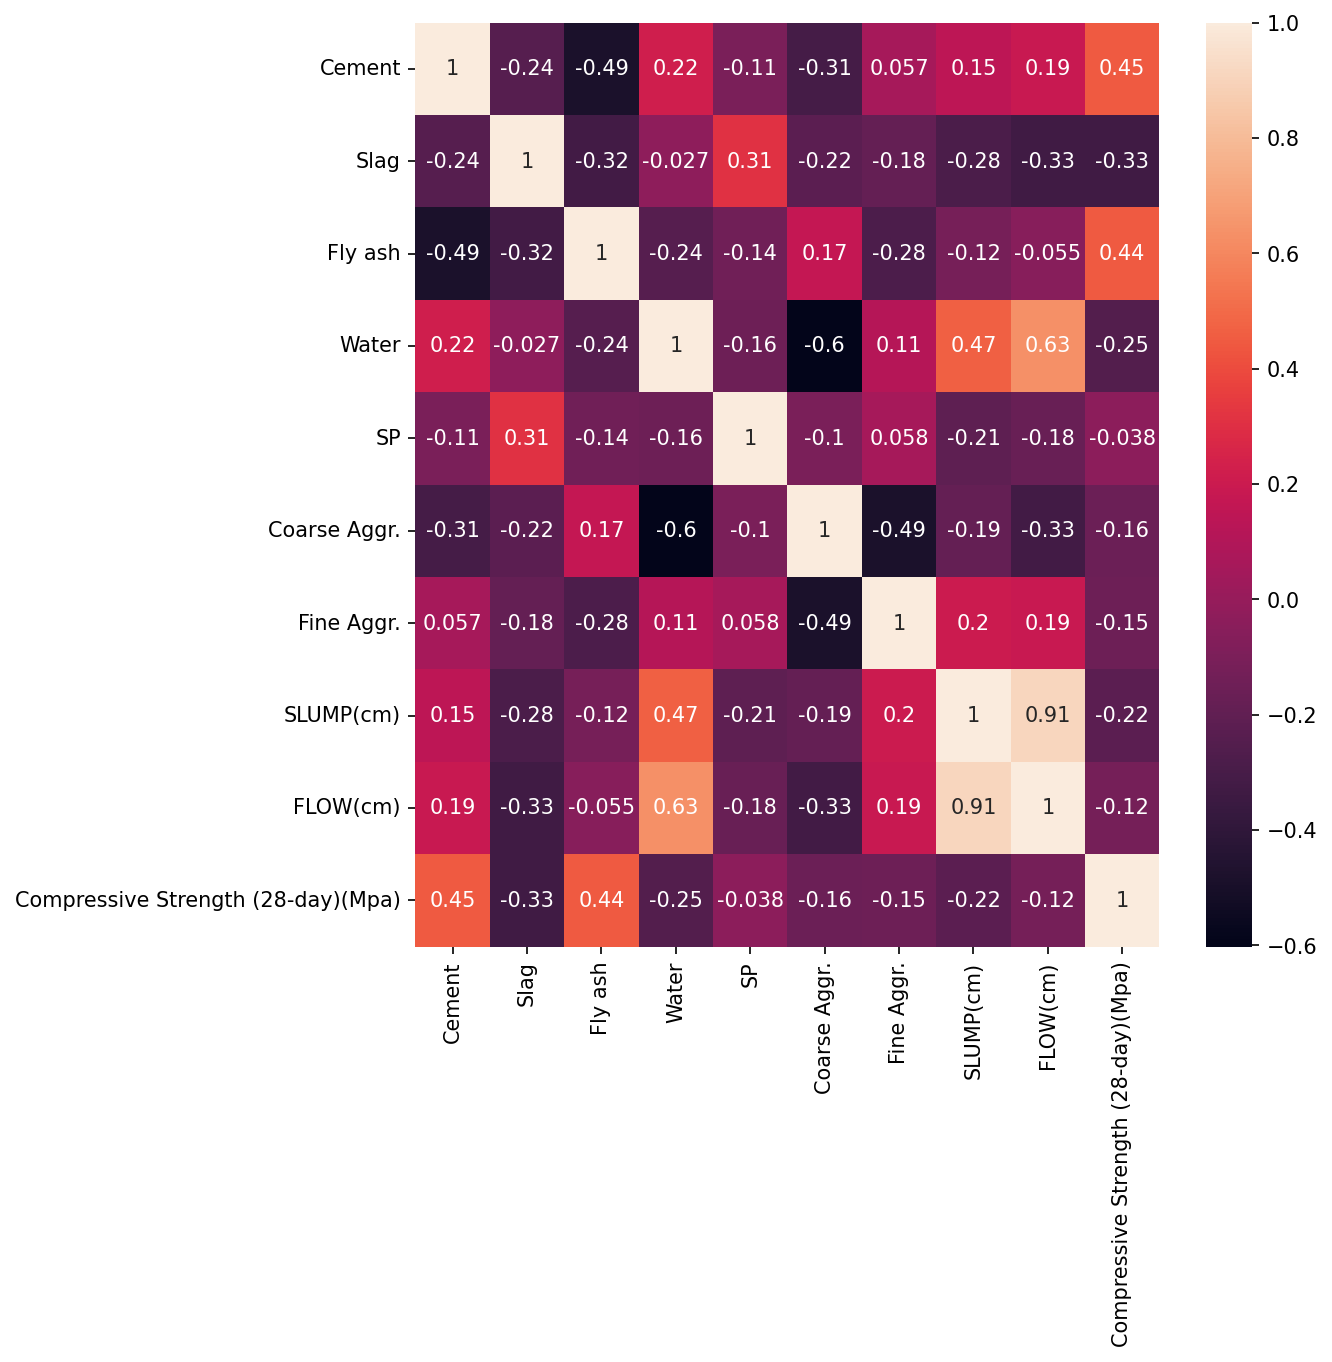

In [5]:
plt.figure(figsize=(8,8),dpi=150)
sns.heatmap(df.corr(), annot=True);

In [6]:
X = df.drop('Compressive Strength (28-day)(Mpa)',axis=1)
y = df['Compressive Strength (28-day)(Mpa)']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [9]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Support Vector Machines - Regression

There are three different implementations of Support Vector Regression: SVR, NuSVR and LinearSVR. LinearSVR provides a faster implementation than SVR but only considers the linear kernel, while NuSVR implements a slightly different formulation than SVR and LinearSVR. See [Implementation details](https://scikit-learn.org/stable/modules/svm.html#svm-implementation-details) for further details.

In [14]:
from sklearn.svm import SVR, LinearSVR

In [16]:
# help(SVR)

In [17]:
base_model = SVR()

Setting C: C is 1 by default and it’s a reasonable default choice. If you have a lot of noisy observations you should decrease it: decreasing C corresponds to more regularization.

LinearSVC and LinearSVR are less sensitive to C when it becomes large, and prediction results stop improving after a certain threshold. Meanwhile, larger C values will take more time to train, sometimes up to 10 times longer

Epsilon: https://stats.stackexchange.com/questions/259018/meaning-of-epsilon-in-svm-regression

In [18]:
base_model.fit(scaled_X_train,y_train)

SVR()

In [19]:
base_preds = base_model.predict(scaled_X_test)

## Evaluation

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [21]:
mean_absolute_error(y_test, base_preds)

5.236902091259179

In [22]:
np.sqrt(mean_squared_error(y_test, base_preds))

6.695914838327134

In [23]:
y_test.mean()

36.26870967741935

## Grid Search in Attempt for Better Model

In [25]:
param_grid = {'C':[.001,.01,.1,.5,1],
             'kernel':['linear','rbf','poly','sigmoid'],
             'gamma':['scale','auto'],
             'degree':[2,3,4],
             'epsilon':[0,.01,.1,.5,1,2]}

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
svr = SVR()

In [28]:
grid = GridSearchCV(svr,param_grid)

In [29]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [30]:
grid.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [31]:
grid_preds = grid.predict(scaled_X_test)

In [33]:
mean_absolute_error(y_test, grid_preds)

2.512801221076102

In [34]:
np.sqrt(mean_squared_error(y_test, grid_preds))

3.1782103051197885